In [652]:
%matplotlib inline
import matplotlib
import collections
import numpy as np
import matplotlib.pyplot as plt
from math import log, exp
import operator
from collections import defaultdict
from collections import Counter

# Lab 1: Text Corpora and Language Modelling

Welcome to the first lab assignment of INFOMNLP 2020. 

This lab is meant to help you get familiar with some language data, and use this data to estimate simple models called N-gram language models.

First you will use the **Penn Treebank**, which is a collection of newspaper articles from the newspaper 
The Wall Street Journal. The idea is to examine the data and notice interesting properties. This will not take more than a few lines of code. The Penn Treebank may be the most widely used corpus in NLP.

Then you will use a corpus consisting of **TedX** talks. This you will use to estimate an **N-gram language model** for different orders of N, and use this this for some tasks.

The datasets are on Blackboard. Download the zip and make sure to put the files in the same directory as the notebook.

### Rules
* The lab exercises should be made in **groups of two people**.

* The assignment should submitted to **Blackboard** as `.ipynb`. Only **one submission per group**.

* The **filename** should be `lab1_id1_id2.ipynb`.
 
* The questions marked **Extra** or **Optional** are an additional challenge for those interested in going the extra mile. 

* We may not grade all sub-questions (instead, we may choose a sub-set and scale the points). However, solve them as if they were.

Notes on implementation:

* You should **write your code and answers in this iPython Notebook**. (See http://ipython.org/notebook.html for reference material.) If you have problems, please contact your teaching assistant.

* Use only **one cell for code** and **one cell for markdown** answers!    

    * Put all code in the cell with the `# YOUR CODE HERE` comment.
    
    * For theoretical questions, put your solution in the YOUR ANSWER HERE cell.
    
* Test your code and **make sure we can run your notebook**

# 1. Penn treebank

## Exercise 1.1 
(40 points, 5 points per subquestion )

You are provided with a corpus containing words with their Part-of-Speech tags (POS-tags for short). The format is
**word|POS** (one sentence per line) and the file name is **sec02-22.gold.tagged**. This data is extracted from Sections 02-22 from the Penn Treebank: these sections are most commonly used for training statistical models like POS-taggers and parsers.

**[Hint]** **Figure 8.1** in chapter 8 of Jurafsky and Martin (see (https://web.stanford.edu/~jurafsky/slp3/8.pdf)) holds a summary of the 45 POS-tags used in the Penn Treebank tagset together with their meaning and some examples. (If you are keen on learning more about the word-classes represented POS-tags and their definitions you can do a litle reading ahead for next week and already have a look at section 8.1 of the same chapter).

**[Hint]** the Python library [collections](https://docs.python.org/2/library/collections.html) has an object called `Counter` which will come in handy for this exercise.

**(a)** How large is the corpus? (i.e. how **many tokens**). And what is the size of the **vocabulary** used in this corpus? 

Estimate the vocabulary size both by **lowercasing** all the words as well as by leaving the words in their **original orthography**. What is an advantage of lowercasing all the words in your corpus? What is a notable downside? **Give examples.**

__Answer:__ The data set contains 756.019 tokens. Before lowercasing, it contains 34.064 unique words; after lowercasing, it contains 29.392 unique words. Lowercasing is an excellent way to deal with sparsity as this increases the evidence for words that appear in different forms, e.g. 'Canada' and 'canada' would otherwise be counted as two separate words and, thus, seen as two independent pieces of evidence. Further, lowercasing increases search time, e.g. looking for 'usa' might not yield any results without lowercasing; however, with lowercasing 'USA' and 'usa' become the same search query. Although lowercasing is often useful, in some applications, such as training NNs to read and write computer code, preserving the original orthography is essential. 

In [706]:
train_sentences = []
with open('sec02-21.gold.tagged', 'r') as train_set:
    train_sentences = train_set.readlines()

train_sentences_POS_split = [[word.split('|') for word in sentence.split()] for sentence in train_sentences ]
train_sentences_POS_removed = [[word_pos_pair[0] for word_pos_pair in sentence] for sentence in train_sentences_POS_split ]
train_sentences_lower = [[word.lower() for word in sentence] for sentence in train_sentences_POS_removed ]

train_tokens = []
for sentence in train_sentences_lower:
    tokens_sentence = []
    for word in sentence:
        tokens_sentence += list(word)
    train_tokens.append(tokens_sentence)
    
train_words = [[word for word in sentence if word.isalpha()] for sentence in train_sentences_POS_removed]
train_words_lower = [[word for word in sentence if word.isalpha()] for sentence in train_sentences_lower]

c_train_word = collections.Counter()
counter = collections.Counter()
for train_word in train_words:
    c_train_word.update(train_word)
print('Size of vocabulary: ', len(c_train_word))

c_train_word_lower = collections.Counter()
for train_word_lower in train_words_lower:
    c_train_word_lower.update(train_word_lower)
print('Size of vocabulary after lowering: ', len(c_train_word_lower))

print('Size of token set: ', sum(c_train_word.values()))

Size of vocabulary:  34064
Size of vocabulary after lowering:  29392
Size of token set:  756019


------
For the rest of this exercise you should use the **original orthography** of the data when answering the questions.

------


**(b)** Plot a graph of word frequency versus rank of a word, in this corpus. Does this corpus obey **Zipf’s law**?


__Answer:__ As is evident by the plot below, the rank-frequency distribution is an inverse relation in this corpus and, thus, it obeys Zipf's law.

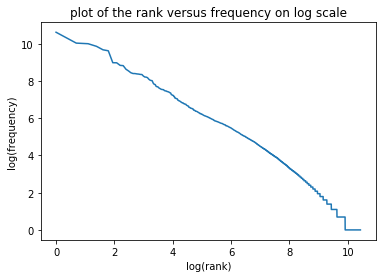

In [53]:
x_rank = []
y_frequency = []
len_corpus = len(c_train_word)
frequencies = c_train_word.most_common(len_corpus)
for i in range(1, len_corpus+1):
    x_rank.append(log(i))
    y_frequency.append(log(frequencies[i-1][1]))

plt.title('plot of the rank versus frequency on log scale')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.plot(x_rank, y_frequency)

**(c)** What are the **20 most common words** in the corpus and how often do they occur? What is the 50th most common word, the 100th and the 1000th and how often do they occur?

__Answer:__ The 20 most common words and their respective frequencies are: [('the', 47666), ('of', 22858), ('to', 22210), ('a', 20031), ('in', 16824), ('and', 16458), ('that', 8396), ('for', 8377), ('is', 6925), ('it', 5792), ('said', 5606), ('on', 5335), ('at', 4651), ('by', 4593), ('as', 4582), ('from', 4479), ('with', 4369), ('million', 4355), ('was', 3881), ('be', 3695)]

The 50th most common word and its frequency is:  ('who', 1588)
The 100th most common word and its frequency is:  ('any', 742)
The 1000th most common word and its frequency is:  ('resources', 98

The 20 most common words and their respective frequencies:  [('the', 40839), ('of', 22782), ('to', 22056), ('a', 19171), ('and', 15906), ('in', 15085), ('that', 7951), ('for', 7912), ('is', 6893), ('The', 6791), ('said', 5597), ('on', 5112), ('it', 4639), ('by', 4450), ('from', 4437), ('million', 4355), ('at', 4313), ('as', 4237), ('with', 4214), ('was', 3875)]


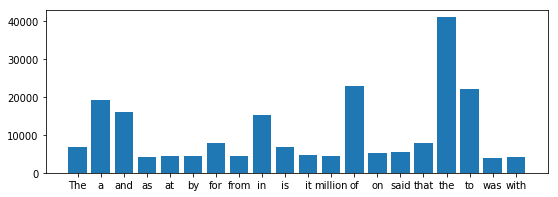

The 50th most common word and its frequency is:  ('been', 1574)
The 100th most common word and its frequency is:  ('there', 705)
The 1000th most common word and its frequency is:  ('crash', 99)


In [54]:
import matplotlib.pyplot as plt

most_common_train_words = c_train_word.most_common(20)

print('The 20 most common words and their respective frequencies: ', most_common_train_words)

x, y = zip(*most_common_train_words)
plt.figure(figsize=(9, 3))
plt.bar(x, y)
plt.show()

print('The 50th most common word and its frequency is: ', c_train_word.most_common(50)[49])
print('The 100th most common word and its frequency is: ', c_train_word.most_common(100)[99])
print('The 1000th most common word and its frequency is: ', c_train_word.most_common(1000)[999])

**(d)** How many different Part-of-speech tags are present in the corpus?

__Answer:__ This corpus contains 40 POS tags.

In [55]:
train_POS_tags = [[word_pos_pair[1] for word_pos_pair in sentence if word_pos_pair[1].isalpha()] for sentence in train_sentences_POS_split]
c_train_pos_tags = collections.Counter()
for train_POS_tag in train_POS_tags:
    c_train_pos_tags.update(train_POS_tag)
print('Number of POS tags: ', len(c_train_pos_tags))

Number of POS tags:  40


**(e)** Print a list of the **10 most commonly occurring POS tags** in the data. For each of these POS tags, what are the **3 most common words** that belong to that class?

__Answer:__ The 10 most common POS tags are:  ['nn', 'in', 'nnp', 'dt', 'jj', 'nns', 'cd', 'rb', 'vbd', 'vb']. 
The three most common words associated with ' in ' are:  [('of', 22854), ('in', 16586), ('for', 8372)]
The three most common words associated with ' dt ' are:  [('the', 47619), ('a', 19963), ('an', 3271)]
The three most common words associated with ' nnp ' are:  [('mr.', 4147), ('u.s.', 1577), ('corp.', 1207)]
The three most common words associated with ' cd ' are:  [('million', 4355), ('billion', 1780), ('one', 1475)]
The three most common words associated with ' nn ' are:  [('%', 4866), ('company', 2475), ('year', 2231)]
The three most common words associated with ' nns ' are:  [('years', 1167), ('shares', 1135), ('sales', 1082)]
The three most common words associated with ' vbd ' are:  [('said', 5479), ('was', 3880), ('were', 1903)]
The three most common words associated with ' rb ' are:  [("n't", 3212), ('also', 1506), ('not', 1361)]
The three most common words associated with ' vb ' are:  [('be', 3694), ('have', 1088), ('make', 498)]
The three most common words associated with ' jj ' are:  [('new', 1426), ('other', 1396), ('last', 1150)]

In [56]:
most_common_train_pos = [tag_frequency_pair[0] for tag_frequency_pair in c_train_pos_tags.most_common(10)]   
print('The 10 most common POS tags are: ', most_common_train_pos)
train_pos_word = {}
for sentence in train_sentences_POS_split:
    for pair in sentence:
        if pair[1] in train_pos_word and pair[1] in most_common_train_pos:
            train_pos_word[pair[1]].append(pair[0])
        if pair[1] not in train_pos_word and pair[1] in most_common_train_pos: 
            train_pos_word[pair[1]] = [pair[0]]
        
for train_pos_tag in train_pos_word:
    c_train_word = collections.Counter()
    c_train_word.update(train_pos_word[train_pos_tag])
    print('The three most common words associated with \'', train_pos_tag, '\' are: ', c_train_word.most_common(3))  

The 10 most common POS tags are:  ['NN', 'IN', 'NNP', 'DT', 'JJ', 'NNS', 'CD', 'RB', 'VBD', 'VB']
The three most common words associated with ' IN ' are:  [('of', 22778), ('in', 14852), ('for', 7907)]
The three most common words associated with ' DT ' are:  [('the', 40831), ('a', 19151), ('The', 6753)]
The three most common words associated with ' NNP ' are:  [('Mr.', 4147), ('U.S.', 1577), ('Corp.', 1186)]
The three most common words associated with ' CD ' are:  [('million', 4355), ('billion', 1780), ('one', 1203)]
The three most common words associated with ' NN ' are:  [('%', 4866), ('company', 2457), ('year', 2220)]
The three most common words associated with ' NNS ' are:  [('years', 1164), ('shares', 1128), ('sales', 939)]
The three most common words associated with ' VBD ' are:  [('said', 5476), ('was', 3874), ('were', 1900)]
The three most common words associated with ' RB ' are:  [("n't", 3211), ('also', 1420), ('not', 1287)]
The three most common words associated with ' VB ' a

**(f)** A single word may have several POS-tags. For example, *record* can be a both a **noun** *(buy a record)* or a **verb** *(record a lecture)*. This make POS-tags extremely useful for **disambiguation**.

What percentage of the words in the vocabulary is **ambiguous**? (i.e. have more than one POS tag?) What are the 10 most frequent combinations of POS tags in the case of ambitguity? Which words are **most ambiguous**? Give some of them.

__Answer:__ 5955 words in the training set, roughly 17.5%, are ambiguous.  
The 10 most frequent combinations of ambiguous POS tags are: ["['VBN', 'VBD']", "['JJ', 'NN']", "['NNP', 'NN']", "['VBD', 'VBN']", "['VB', 'VBP']", "['NN', 'JJ']", "['NN', 'VB']", "['NNS', 'VBZ']", "['VBG', 'NN']", "['NN', 'NNP']"].
The 10 most frequent ambiguous words are: ['set', 'many', 'open', 'down', 'in', 'that', 'own', 'cut', 'point', 'left'].

In [163]:
word_pos_pairs = {}
for sentence in train_sentences_POS_split:
    for word_pos_pair in sentence:
        word = word_pos_pair[0]
        tag = word_pos_pair[1]
        if word in word_pos_pairs and tag not in word_pos_pairs[word]: word_pos_pairs[word].append(tag)
        if word not in word_pos_pairs: 
            word_pos_pairs[word] = [tag]

size_data_set = 0
ambiguous_words = []
no_ambiguous_words = 0
pos_combinations_occ = {}
for word in word_pos_pairs:
    tags = word_pos_pairs[word]
    size_data_set += c_train_word[word]
    if len(tags) > 1: no_ambiguous_words += c_train_word[word]
    if len(tags) > 1: no_ambiguous_words += 1
    if len(tags) > 1 and word not in ambiguous_words: ambiguous_words.append(word)
    if len(tags) > 1 and str(tags) not in pos_combinations_occ: pos_combinations_occ[str(tags)] = 1 
    if len(tags) > 1 and str(tags) in pos_combinations_occ: pos_combinations_occ[str(tags)] += 1 

most_frequent_amb_tags = dict(collections.Counter(pos_combinations_occ).most_common(10))
most_frequent_amb_words = sorted(word_pos_pairs.items(), key=lambda x: len(set(x[1])), reverse=True)[:10]
    
print('The dataset contains', len(ambiguous_words), 'ambiguous words.')
print('The 10 most frequent combinations of ambiguous POS tags are:', most_frequent_amb_tags)
print('The 10 most frequent ambiguous words are:', most_frequent_amb_words)   

The dataset contains 5955 ambiguous words.
The 10 most frequent combinations of ambiguous POS tags are: {"['VBN', 'VBD']": 404, "['JJ', 'NN']": 397, "['NNP', 'NN']": 388, "['VBD', 'VBN']": 370, "['VB', 'VBP']": 279, "['NN', 'JJ']": 267, "['NN', 'VB']": 255, "['NNS', 'VBZ']": 238, "['VBG', 'NN']": 174, "['NN', 'NNP']": 163}
The 10 most frequent ambiguous words are: [('set', ['VBN', 'NN', 'VBD', 'VB', 'VBP', 'JJ', 'VBZ']), ('many', ['JJ', 'NN', 'RB', 'DT', 'PDT', 'VB', 'NP']), ('open', ['VB', 'JJ', 'RP', 'RB', 'VBP', 'NN', 'VBZ']), ('down', ['RB', 'RP', 'IN', 'JJ', 'RBR', 'VBP', 'NN']), ('in', ['IN', 'RP', 'RB', 'CC', 'FW', 'RBR']), ('that', ['IN', 'WDT', 'DT', 'RB', 'VBP', 'NN']), ('own', ['JJ', 'VB', 'VBP', 'NN', 'VBZ', 'VBN']), ('cut', ['VB', 'VBD', 'NN', 'VBN', 'VBP', 'JJ']), ('point', ['NN', 'VB', 'VBP', 'VBZ', 'JJ', 'VBN']), ('left', ['VBD', 'VBN', 'JJ', 'RB', 'NN', 'VB'])]


**(g)**  Print some of these words with their multiple POS-tags. Do you **understand the ambiguity**? Use figure 10.1 mentioned above to interpret the POS-tags.

__Answer:__ It is clear why words such as 'set' are ambiguous once you consider the contexts in which these can occur. The verb (VB) 'set' can, for example, also be its past particle (VBN), past tense (VBD),  simultaneously, it can also be a noun meaning 'batches'.  Similarly, the verb 'to point' can also be a noun meaning 'dot' or 'mark'.

In [161]:
print('The 10 most frequent ambiguous words and their respective POS tags are:', most_frequent_amb_words)   

The 10 most frequent ambiguous words and their respective POS tags are: [('set', ['VBN', 'NN', 'VBD', 'VB', 'VBP', 'JJ', 'VBZ']), ('many', ['JJ', 'NN', 'RB', 'DT', 'PDT', 'VB', 'NP']), ('open', ['VB', 'JJ', 'RP', 'RB', 'VBP', 'NN', 'VBZ']), ('down', ['RB', 'RP', 'IN', 'JJ', 'RBR', 'VBP', 'NN']), ('in', ['IN', 'RP', 'RB', 'CC', 'FW', 'RBR']), ('that', ['IN', 'WDT', 'DT', 'RB', 'VBP', 'NN']), ('own', ['JJ', 'VB', 'VBP', 'NN', 'VBZ', 'VBN']), ('cut', ['VB', 'VBD', 'NN', 'VBN', 'VBP', 'JJ']), ('point', ['NN', 'VB', 'VBP', 'VBZ', 'JJ', 'VBN']), ('left', ['VBD', 'VBN', 'JJ', 'RB', 'NN', 'VB'])]


**(h)** Ambiguous words do not account for a great percentage of the vocabulary. Yet they are among the most commonly occuring words of the English language. What **percentage of the dataset is ambiguous**?

__Answer:__ There are 75.6019 non-unique words in the dataset. 48.4025 of these words are ambiguous.
This makes up 64 percent of the dataset.

In [172]:
print('There are', size_data_set, 'non-unique words in the dataset.', no_ambiguous_words, 'of these words are ambiguous.')
print('This makes up', round((no_ambiguous_words/size_data_set)*100), 'percent of the dataset.')

There are 756019 non-unique words in the dataset. 484025 of these words are ambiguous.
This makes up 64 percent of the dataset.


## Exercise 1.2 
(10 points, 5 per subquestion)

You are also provided with another file called **sec00.gold.tagged**. 
Section 00 of the Penn Treebank is typically used as development data.

**(a)** How many **unseen words** are present in the development data (i.e., words that have not occurred in the training data)?

__Answer:__ There are 946  words in the test set which were not in the training set.

In [711]:
with open('sec00.gold.tagged', 'r') as test_data:
    test_sentences = test_data.readlines()
    
test_sentences_POS_split = [[word.split('|') for word in sentence.split()] for sentence in test_sentences ]
test_sentences_POS_removed = [[word_pos_pair[0] for word_pos_pair in sentence] for sentence in test_sentences_POS_split ]
test_words = [[word for word in sentence if word.isalpha()] for sentence in test_sentences_POS_removed]

#print(test_words)
c_test_word = collections.Counter()
for test_word in test_words:
    c_test_word.update(test_word)

unseen_words = []
for test_word in c_test_word:
    if test_word not in c_train_word and test_word not in unseen_words:
        unseen_words.append(test_word)
        
print(len(unseen_words), ' words are in the test set which were not in the training set')

946  words are in the test set which were not in the training set


**(b)** What are the three **POS tag categories** that the most **unseen words** belong to?

__Answer:__ The three most common POS tags for unseen words and their respective frequencies are:  [('NNP', 455), ('NN', 132), ('NNS', 102)].

In [712]:
def get_pos_tag(word, data_set):
    for sentence in data_set:
        for word_pos_pair in sentence:
            if word_pos_pair[0] == word: return word_pos_pair[1] 
            
unseen_pos =[]
for word in unseen_words:
    unseen_pos.append(get_pos_tag(word, test_sentences_POS_split))
    
c_test_pos = collections.Counter()
c_test_pos.update(unseen_pos)    
print('The three most common POS tags for unseen words and their frequencies are: ', c_test_pos.most_common(3))

The three most common POS tags for unseen words and their frequencies are:  [('NNP', 455), ('NN', 132), ('NNS', 102)]


# 2. Language Models

This part of the lab will be covered next week. If you have prior exposure to NLP, go ahead and finish this part! If you don't, start anyway, and this part will be clear after the lecture. 

Reference **chapter 3** of JM3 *Language Modeling with N-Grams*. 

----------

Models that assign **probabilities** to **sequences of words** are called language **language
modelels** or **LMs**. The simplest model that assigns probabilities to sentences and sequences of words is the **N-gram** model.

Recall that an *N*-gram language model uses **conditional probabilities** of the form
    
$$P(w_k \mid w_{k-N+1} \dots w_{k-1})$$

to **approximate** the full **joint probability**

$$P(w_1 \dots w_n)$$

of a sequence of words $w_1 \dots w_n$.

The easiest way of obtaining estimates for the probabilities $P(w_k \mid w_{k-N+1} \dots w_{k-1})$ is to use the **maximum likelihood estimate** or **MLE**, a widely used statistical estimation method (https://en.wikipedia.org/wiki/Maximum_likelihood_estimation). You count and normalize:

$$P_{MLE}(w_k \mid w_{k-N+1} \dots w_{k-1}) = \frac{C(w_{k-N+1} \dots w_{k-1} w_k)}{C(w_{k-N+1} \dots w_{k-1})}.$$


## Exercise 2.1 
(25 points, 15 and 10 for a and b)

**(a) ** Complete the function `train_ngram` so that you can train a count-based $N$-gram language model on the data found in `data/ted-train.txt` and train this for $N=2,3,4$. 

**(b) ** Extend the function above so that it accepts a parameter `k` for optional add-$k$ smoothing. 

**[Datastructure hint]** If you store the smoothed language in a naive manner (that is, to store *all* the numbers separately) your datastructure will get huge! If $V$ is the vocabulary then the smoothed bigram model assigns probabilities to $|V|^2$ entries. If $|V|$ is around 80k, the naive way requires you to store more than 64 billion floats. Yet almost all of these are actually just $P(w_n|w_{n-1}) = \frac{k}{N + k|V|}$, with $k$ the value with which you smooth and $N=C(w_{n-1})$. Think about how you use this fact to make your model work in practice.

**[Python hint]** The `collections` library has another useful datastructure: the `defaultdict`. Some example uses:

In [237]:
from collections import defaultdict

d = defaultdict(float)
d["new key"]
print(d)

defaultdict(<class 'float'>, {'new key': 0.0})


Compare that to an ordinary dictionary:

In [185]:
d = dict()
d["new key"]

KeyError: 'new key'

Other datatypes as `default_factory`:

In [186]:
d = defaultdict(int)
d["new key"]

0

In [187]:
d = defaultdict(list)
d["new key"]

[]

Converting an already existing `dict`:

In [188]:
d1 = {k: "value" for k in range(1, 11)}
d = defaultdict(float, d1) # convert it to a defaultdict
print(d[5])
print(d[100])

value
0.0


This doesn't work:

In [189]:
d = defaultdict(10)

TypeError: first argument must be callable or None

Use a `lambda` to make the number `10` `callable`":

In [190]:
d = defaultdict(lambda: 10)
d["new key"]

10

In [191]:
d = defaultdict(lambda: defaultdict(float))
d["new key"]

defaultdict(float, {})

Clever use of a `defaultdict` can be the solution to the problem of data-storing in a smoothing $N$-gram pointed out above:
    
    ngram = defaultdict(lambda: k/(N+kV), ngram)

The following function is given:

In [653]:
train_file = "ted-train.txt"

def read(fname, max_lines=np.inf):
    """
    Reads in the data in fname and returns it as
    one long list of words. Also returns a vocabulary in
    the form of a word2index and index2word dictionary.
    """
    data = []
    # w2i will automatically keep a counter to asign to new words
    w2i = defaultdict(lambda: len(w2i))
    i2w = dict()
    start = "<s>"
    end = "</s>"
    
    with open(fname, "r") as fh:
        for k, line in enumerate(fh):
            if k > max_lines:
                break
            words = line.strip().split()
            # assign an index to each word
            for w in words:
                i2w[w2i[w]] = w # trick
            
            sent = [start] + words + [end]
            data.append(sent)

    return data, w2i, i2w

In [791]:
def train_ngram(data, N, k=0):
    """
    Trains an n-gram language model with optional add-k smoothing
    and additionaly returns the unigram model
    
    :param data: text-data as returned by read
    :param N: (N>1) the order of the ngram e.g. N=2 gives a bigram
    :param k: optional add-k smoothing
    :returns: ngram and unigram
    """
    
    #getting global counts
    unigram_counts = defaultdict(float, Counter(word for sentence in data for word in set(sentence))) 
    ngram_counts = get_ngram_counts(data, N)
    no_tokens = sum(unigram_counts.values())
    size_vocab = len(unigram_counts.keys())
    
    #calculating unigram probabilities
    default_value = k/(no_tokens + (k*size_vocab))
    unigram = defaultdict(float) if k == 0 else defaultdict(lambda: default_value)
    for word in unigram_counts:
        unigram[word] = unigram_counts[word]/no_tokens if k == 0 else (unigram_counts[word] + k)/(no_tokens + (k*size_vocab))
    
    #calculating ngram probabilities 
    default_value = k/(no_tokens + (k*size_vocab))
    ngram = defaultdict(lambda: defaultdict(float)) if k == 0 else defaultdict(lambda: defaultdict(lambda: default_value))
    for words in ngram_counts:
        for word in ngram_counts[words]:
            ngram[words][word] = ngram_counts[words][word]/sum(ngram_counts[words].values()) if k == 0 else (ngram_counts[words][word] + k)/(sum(ngram_counts[words].values()) + (k*size_vocab))
    #print(sum(ngram['<s>'].values()), sum(unigram.values())) #sanity check for bigram
    #print(sum(ngram['<s> Here'].values()), sum(unigram.values())) #sanity check for trigram
    return ngram, unigram

def get_ngram_counts(data, N):
    ngram_counts = defaultdict(lambda: defaultdict(int)) 
    for sentence in data:
        for i in range(N-1, len(sentence)):
            start = i-N+1
            end = i-1
            index = ''
            for j in range(0, end+1-start):
                index += sentence[start + j]
                if j < end-start: index += ' '
            ngram_counts[index][sentence[i]] += 1           
    return ngram_counts

data, w2i, i2w = read(train_file)
bigram, unigram = train_ngram(data, N=2, k=0)
trigram, unigram = train_ngram(data, N=3, k=0)
#bigram_smoothed, unigram_smoothed = train_ngram(data, N=2, k=1)
#trigram_smoothed, unigram_smoothed = train_ngram(data, N=3, k=1)

#bigram_smoothed_small_k, unigram_smoothed = train_ngram(data, N=2, k=0.001)
#trigram_smoothed_small_k, unigram_smoothed = train_ngram(data, N=3, k=0.001)
print('Training complete')

Training complete


## Exercise 2.2 (5 points)

You can use an *N*-gram language model to **generate text**. The higher the order *N* the better your model will be able to catch the long-range dependecies that occur in actual sentences and the better your changes are at generating sensible text. But beware: **sparsity** of language data will quickly cause your model to reproduce entire lines from your training data; in such cases only one $w_k$ was observed for the histories $w_{k-N+1}\dots w_{k-1}$ in the entire training-set.

**Complete** the function `generate_sent`. It takes a language model `lm` and an order `N` and should generate a sentence by **sampling** from the language model.

**[Hint]** You can use the method of [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) to generate a sample from a **categorical distribution**, $p_1\dots p_k$ such that $p_i \geq 0$ and $\sum_{i=1}^k p_i = 1$, as follows:

In [790]:
from random import random

P = [0.2,0.5,0.2,0.1]

def sample(P):
    u = random() # uniformly random number between 0 and 1
    #print(u)
    p = 0
    for i, p_i in enumerate(P):
        #print(i, p_i, p)
        if p > u: 
            return i # the first i s.t. p1 + ... + pi > u
        p += p_i
        
print(sample(P))

print(Counter([sample(P) for i in range(1000)])) # check to see if the law of large numbers is still true

2
Counter({2: 492, 3: 210, 1: 192, None: 106})


Inverse transform sampling in the words of Jurafsky and Martin:

> Imagine all the words of the English language covering the probability space
between 0 and 1, each word covering an interval proportional to its frequency. We
choose a random value between 0 and 1 and print the word whose interval includes
this chosen value.

(J&M, section 4.3)

In [873]:
def generate_sent(lm, N):
    sent = '<s>'  
    history = '<s>'
    while len(sent.split()) < N-1:
        index = sample(list(bigram[history].values()))
        next_word = list(bigram[history].keys())[index] if index is not None else list(bigram[history].keys())[0]
        sent += ' '+ next_word
        history += ' '+ next_word
    
    while history.split()[N-2] != '</s>':
        co_occ = lm[history] if N > 1 else lm 
        index = sample(list(co_occ.values())) 
        next_word = list(co_occ.keys())[0] if index is None else list(co_occ.keys())[index] 
        sent += ' '+ next_word
        history = history.split()[N-2] + ' ' + next_word if N>2 else next_word
    return sent
        
print(generate_sent(unigram, 1))  
print(generate_sent(bigram, 2))  
print(generate_sent(trigram, 3))  

<s> Exploitation is about action . </s>


__Example Sentences__: 

__unigram__: Stanford Japan kitchen same insanity risky or wonderful Exploitation who Stanford frontiers winter marvelous probability months CEOs eroding risky grow 're unimaginable how me brilliant the taller Nespresso our nomadic private what demand "Success Nespresso lettuce but activities fail arcs term activities asks slide be new the simplify the time thing exploration me grow activities deserve fail world statistical exotic me wild explore , , Later what dangerously outside annual Spaniard quality done evaporates 

__bigram__: OK , lock the electronic phenomena . 

__trigram__: Small roundabouts are starting companies in India by multinational companies . Exploitation is about action .

### [Extra]

For how many of the histories $w_{k-N+1}\dots w_{k-1}$ is the number of continuations $w_n$ equal to **one**? Calculate the percentage of such cases for the different orders *N*.

And which history has the **most possible continuations**?

## Excercise 2.3 (5 points)

Let $V$ denote our vocabulary. Recall that for any $w$ in $V$ `bigram[w]` defines a conditional probability $p(v|w)$ over $v$ in $V$. In the case of an **unsmoothed bigram**, $p(v|w) = 0$ for most $v\in V$, whereas in the **smoothed bigram** smoothing took care that $p(v|w) \geq 0$ for *all* $v$.

The function `plot_bigram_dist(word, bigram, smoothbigram, k=30)` plots shows $p(v|word)$ for the `k` words $v$. One bar shows the probabilities in `bigram` and one in `smoothbigram`. 

**(a)** Use this function to plot the distribution for at least two words `w` and answer the questions
* What is the effect of smoothing on the bigram distribution of frequent words? 
* What is the effect in the case of infrequent words?
* Explain the difference between the two based on the raw counts of `w` 

**(b)** Now experiment with $k$ much smaller than 1 (but greater than 0!) 
* What are the effects?


**[Hint]** Remember that add-1 smoothing turns 
$$P(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n})}{C(w_{n-1})}$$
into
$$P_{add-1}(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n}) + 1}{C(w_{n-1}) + |V|}.$$

What happens when $C(w_{n-1})$ is relatively big (similiar in of size as $ |V| $)? And what if $C(w_{n-1})$ is small? 

__Answer a)__: We plotted the distribution of the words 'the' and 'president'. While 'the' appears fairly often in the training corpus (114734 times), 'president' only appears 171 times and is, thus, far less frequent. For the frequent word 'the', smoothing decreases the conditional probability of the 30 most frequently co-occurring words by roughly 50%. However, for the infrequent word 'president', the conditional probabilities decrease significantly, bringing them close to zero. In the case of the most frequently co-occurring word 'of', the probability drops from just under 30% to just above 0%. Therefore, for large $c(w_{n-1})$ close to $|V|$, the denominator of the add-1 conditional probability roughly doubles, thus approximately halving the conditional probability in comparison to the unsmoothed model. However, for infrequent words with small $c(w_{n-1})$, the denominator of the add-1 conditional probability is significantly large than that of the unsmoothed model. As a result, the conditional probabilities are divided by a number much larger than they previously were and, as a result, are much smaller. We conclude that the conditional probability words following infrequent words decreases a lot more than that of frequent words when applying smoothing. 

__Answer b)__: We selected $k = 0.001$ and observed that for both frequent and infrequent words, the conditional probabilities decreased only marginally. Once again, the decrease was more significant for infrequent words, while it was barely noticeable for frequent words.  

In [736]:
import pandas as pd
import seaborn as sns    

def plot_bigram_dist(word, bigram, smoothbigram, k=30):
    d = bigram[word]
    ds = smoothbigram[word]

    # sort the probabilities
    d_sort = sorted(d.items(), reverse=True, key=lambda t: t[1])[0:k]
    ds_sort = sorted(ds.items(), reverse=True, key=lambda t: t[1])[0:k]
    
    _, probs = zip(*d_sort)
    smooth_ws, smooth_probs = zip(*ds_sort)
    
    # make up for the fact that in the unsmoothed case  probs is generally less than k long
    probs = probs + (0,) * (k-len(probs)) 

    w_data = pd.DataFrame({"w": smooth_ws * 2,
                           "P({}|w)".format(word): probs + smooth_probs,
                           "smoothing": ["unsmoothed"]*k + ["smoothed"]*k})
    
    fig, ax = plt.subplots(figsize=(10,10))
    plt.xticks(rotation=90)
    g = sns.barplot(ax=ax, x="w", y="P({}|w)".format(word), hue="smoothing",
                    data=w_data, palette="Blues_d")   

/Users/user/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


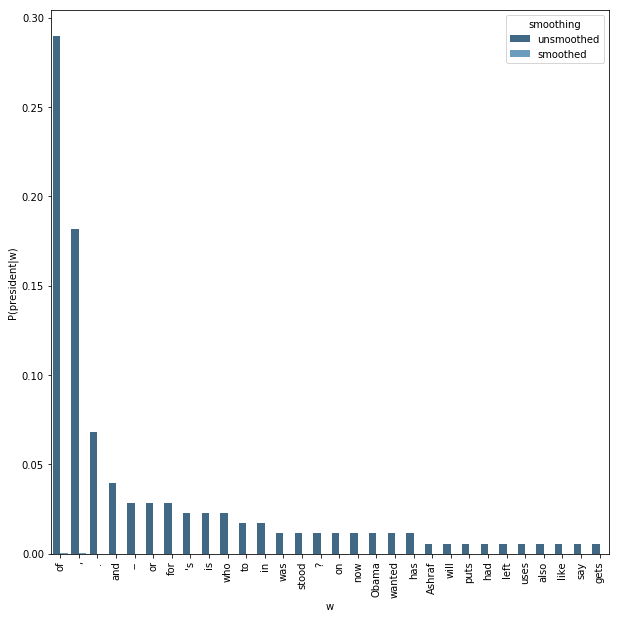

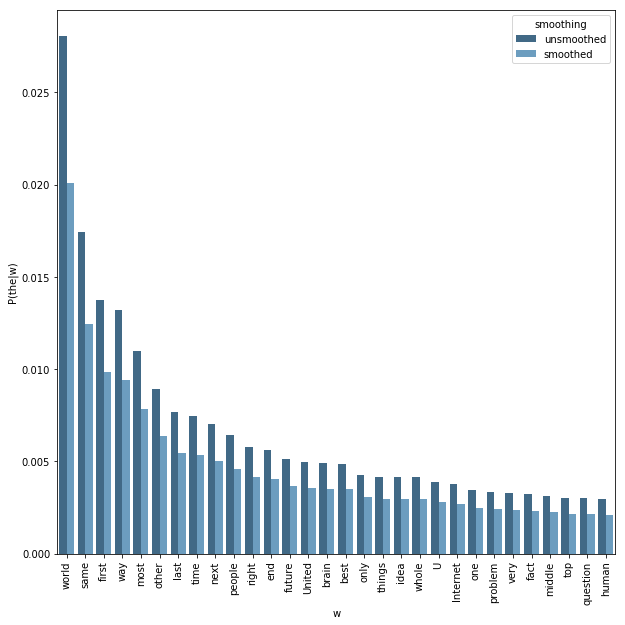

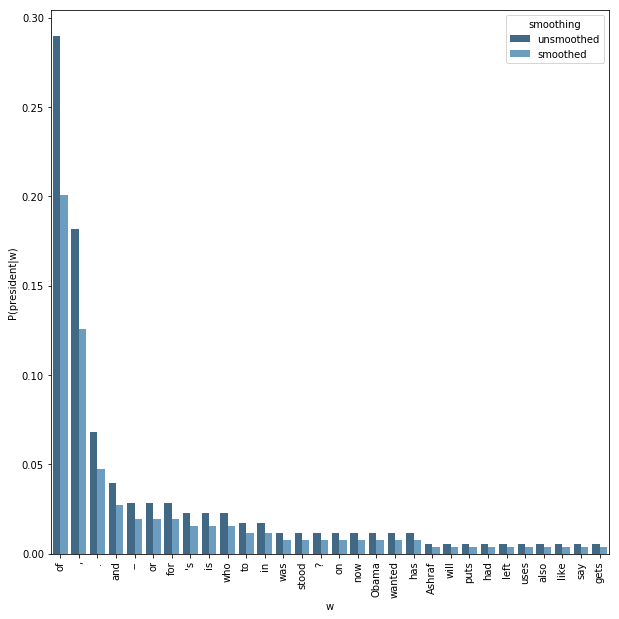

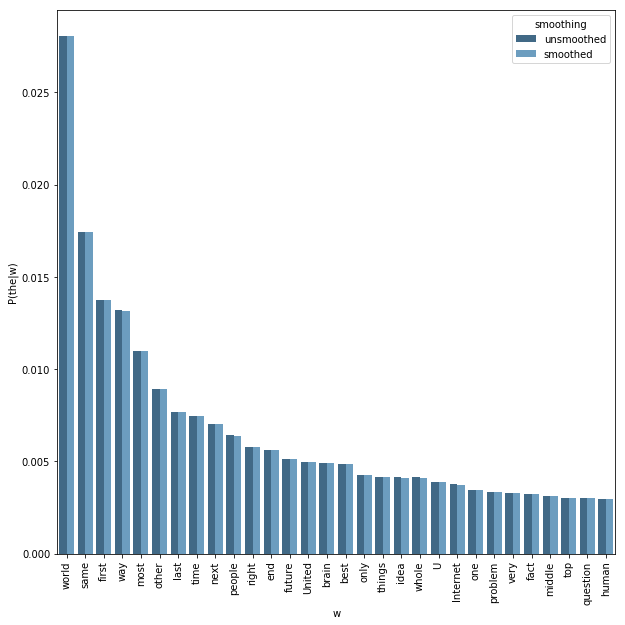

In [743]:
plot_bigram_dist('president', bigram, bigram_smoothed)
plot_bigram_dist('the', bigram, bigram_smoothed)

plot_bigram_dist('president', bigram, bigram_smoothed_small_k)
plot_bigram_dist('the', bigram, bigram_smoothed_small_k)


**Recall** that if we have a sentence $w_1,\dots,w_n$ we can write

$$P(w_1\dots w_n) = P(w_1)P(w_2|w_1) \cdots P(w_i|w_1 \dots w_{n-1}) \approx P(w_1)P(w_2|w_1)\cdots P(w_{N-1}|w_1\dots w_{N-2})\prod_{i=N}^{n} P(w_i|w_{i-(N-1)}\dots w_{i-1})$$

where in the last step we make an $N$-gram approximation of the full conditionals.

For example, in the case of a bigram (N=2), the above expression reduces to

$$P(w_1 \dots w_n)\approx P(w_1)\prod_{i=2}^{n} P(w_i| w_{i-1}).$$

## Exercise 2.4 (5 points)

The following sentences are taken from the **training data**. Use your **unsmoothed unigram**, **bigram**, and **trigram** language model to estimate their **probabilities**:

    1. Every day was about creating something new .
    2. In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought 
       together in a collision , producing a burst of pure energy .

**Repeat** this with the **smoothed (add-1)** versions of the N-grams. What is the effect of smoothing on the probabilities?


__Answer:__ The probability of sentence (1) in our bigram model was 2.5e-16 percent, while it was 4.4e-08 percent for the trigram model.
In the case of our smoothed bigram and trigram model using k=1, the probability was 9.4e-26 and 5.95e-29, respectively. 

The probability of sentence (2) in our bigram model was 2.5e-16 percent, while it was 1.2e-28 percent for the trigram model.
In the case of our smoothed bigram and trigram model using k=1, the probability was 1.1e-115 and 2.2e-131, respectively. 

Smoothing reduces the probability of both sentences 1 and 2 occurring. The reason for this reduction is apparent since the idea of smoothing is to 'steal' some of the probability of probable events and redistribute it to unlikely events. Therefore, smoothing reduces the probabilities of both sentences, especially when using k=1. Moreover, we noticed that the probabilities increased when using a trigram over a bigram model. However, smoothing reverses this trend. A trigram model contains many more events than a bigram model; thus, a more significant portion of the probability distribution has to be moved. 

In [680]:
def get_prob(sentence, N, lm, unigram):
    words = sentence.split()
    prob = unigram[words[0]]
    for i in range(N,len(words)):
        start = i-N
        end = i-2
        index = ''
        for j in range(0, end+1-start):
            index += words[start + j]
            if j < end-start: index += ' '
        prob = prob*(lm[index][words[i-1]])
    return prob*100
       
print('bigram, sentence 1', get_prob('<s> Every day was about creating something new . </s>', 2, bigram, unigram))
print('trigram, sentence 1', get_prob('<s> Every day was about creating something new . </s>', 3, trigram, unigram))
print('smoothed bigram, sentence 1', get_prob('<s> Every day was about creating something new . </s>', 2, bigram_smoothed, unigram_smoothed))
print('smoothed trigram, sentence 1', get_prob('<s> Every day was about creating something new . </s>', 3, trigram_smoothed, unigram_smoothed))

print('bigram, sentence 2', get_prob('<s> In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy . </s>', 2, bigram, unigram))
print('trigram, sentence 2', get_prob('<s> In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy . </s>', 3, trigram, unigram))
print('smoothed bigram, sentence 2', get_prob('<s> In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy . </s>', 2, bigram_smoothed, unigram_smoothed))
print('smoothed trigram, sentence 2', get_prob('<s> In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy . </s>',3, trigram_smoothed, unigram_smoothed))

bigram, sentence 1 2.532831168100373e-16
trigram, sentence 1 4.375653661927842e-08
smoothed bigram, sentence 1 9.41506599379201e-26
smoothed trigram, sentence 1 5.950238334713013e-29
bigram, sentence 2 1.0938682884573808e-71
trigram, sentence 2 1.1748499854138095e-28
smoothed bigram, sentence 2 1.0733614194267613e-115
smoothed trigram, sentence 2 2.2322638971524791e-131


## Exercise 2.5 (5 points)

The above sentences were taken from the training set, hence they will all have probability greater than 0. The big challenge for our language model are of course with sentence that contain unseen N-grams: if such an N-gram occurs our model immediately assigns the sentence probability zero.

The following three senteces are taken from the **test set** availlable in the file **ted-test.txt**. What probabilities do your smoothed and unsmoothed language models asign in this case?

    1. Because these robots are really safe .
    2. We have sheer nothingness on one side , and we have this vision of a reality that encompasses every 
       conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible 
       reality .

__Answer:__ The probability of sentence (1) in our bigram model was 1.5e-14 percent, while it was 0 percent for the trigram model. In the case of our smoothed bigram and trigram model using k=1, the probability was 5e-23 and 1.2e-32, respectively. Therefore, while the probability decreased for the bigram model once we applied smoothing for reasons mentioned above, the probability was non-zero after smoothing in the trigram model.

The probability of sentence (2) in our bigram and trigram model was 0 percent. In the case of our smoothed bigram and trigram model using k=1, the probability was 5.8e-133 and 3.7e-181, respectively. Once again, both probabilities were zero before smoothing and increased slightly after smoothing.

In [681]:
print('bigram, sentence 1', get_prob('<s> Because these robots are really safe . </s>', 2, bigram, unigram))
print('trigram, sentence 1', get_prob('<s> Because these robots are really safe . </s>', 3, trigram, unigram))
print('smoothed bigram, sentence 1', get_prob('<s> Because these robots are really safe . </s>', 2, bigram_smoothed, unigram_smoothed))
print('smoothed trigram, sentence 1', get_prob('<s> Because these robots are really safe . </s>', 3, trigram_smoothed, unigram_smoothed))

print('bigram, sentence 2', get_prob('<s> We have sheer nothingness on one side , and we have this vision of a reality that encompasses every \
   conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible \
   reality . </s>', 2, bigram, unigram))
print('trigram, sentence 2', get_prob('<s> We have sheer nothingness on one side , and we have this vision of a reality that encompasses every \
   conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible \
   reality . </s>', 3, trigram, unigram))
print('smoothed bigram, sentence 2', get_prob('<s> We have sheer nothingness on one side , and we have this vision of a reality that encompasses every \
   conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible \
   reality . </s>', 2, bigram_smoothed, unigram_smoothed))
print('smoothed trigram, sentence 2', get_prob('<s> We have sheer nothingness on one side , and we have this vision of a reality that encompasses every \
   conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible \
   reality . </s>',3, trigram_smoothed, unigram_smoothed))

bigram, sentence 1 1.4603210564431147e-14
trigram, sentence 1 0.0
smoothed bigram, sentence 1 5.009759277577353e-23
smoothed trigram, sentence 1 1.1473812212152017e-32
bigram, sentence 2 0.0
trigram, sentence 2 0.0
smoothed bigram, sentence 2 5.8036193310973446e-133
smoothed trigram, sentence 2 3.735970169514123e-181


### [Extra]

**Optional** What percentage of the sentences in the test set get assigned probability 0 under your smoothed and unsmoothed language models? 

In [29]:
### ANSWER HERE ###

## Exercise 2.6 (5 points)

**Perplexity** is very frequently used **metric** for evaluating probabilistic models such as language models. The perplexity (sometimes called **PP** for short) of a language model on a sentence is the **inverse probability** of the sentence, **normalized** by the number of words:

$$PP(w_1 \dots w_n) = P(w_1\dots w_n)^{-\frac{1}{n}}.$$

Here we can again approximate $P(w_1 \dots w_n)$ with N-gram probabilities, as above.
Note: $(x_1\cdots x_n)^{-\frac{1}{n}}$ is the **geometric mean** of the numbers $x_1,\dots,x_n$. It is like the (regular) artithmetic mean, but with **products** instead of **sums**. The geometric mean is a more natural choice in the case of *PP* because behind $P(w_1\dots w_n)$ is a series of $n$ products ([more here](https://en.wikipedia.org/wiki/Geometric_mean)).



Compute the perplexity of the training sentences from excercise 2.1. What big difference between the **probabilities** of the sentences and the **perplexities** of the sentences do you notice?

__Answer:__ The most significant difference between the two measures is that while probabilities are below or equal to one, perplexities are greater or equal to one. These measures have an inverse relationship, which we also observed on our training corpus: Higher probabilities mean lower perplexities.

In [702]:
for sentence in data:
    str = sentence[0]
    for i in range(1, len(sentence)):
        str+= ' ' + sentence[i]
    prob = get_prob(str, 2, bigram, unigram)
    perplexity = (1/prob)**(1.0/float(len(sentence)))
    print('For sentence \'', str, '\' we obtain a probability of', prob, 'and a perplexity of', perplexity)

For sentence ' <s> Here are two reasons companies fail : they only do more of the same , or they only do what 's new . </s> ' we obtain a probability of 3.53850025463259e-47 and a perplexity of 72.1185905923668
For sentence ' <s> To me the real , real solution to quality growth is figuring out the balance between two activities : exploration and exploitation . </s> ' we obtain a probability of 1.620103077146549e-53 and a perplexity of 129.30588591729128
For sentence ' <s> Both are necessary , but it can be too much of a good thing . </s> ' we obtain a probability of 4.182982904829217e-25 and a perplexity of 27.16628359121339
For sentence ' <s> Consider Facit . </s> ' we obtain a probability of 2.632476505181829e-06 and a perplexity of 13.059516524207048
For sentence ' <s> I 'm actually old enough to remember them . </s> ' we obtain a probability of 3.034978344395841e-16 and a perplexity of 25.7461993475946
For sentence ' <s> Facit was a fantastic company . </s> ' we obtain a probabilit

For sentence ' <s> Another trap is the success trap . </s> ' we obtain a probability of 2.7514799370258854e-14 and a perplexity of 32.115511987432406
For sentence ' <s> Facit fell into the success trap . </s> ' we obtain a probability of 8.170537022907344e-14 and a perplexity of 28.457344901266982
For sentence ' <s> They literally held the future in their hands , but they couldn 't see it . </s> ' we obtain a probability of 2.7599256520135355e-27 and a perplexity of 29.88860881199755
For sentence ' <s> They were simply so good at making what they loved doing , that they wouldn 't change . </s> ' we obtain a probability of 4.720911717823158e-35 and a perplexity of 52.03537707688345
For sentence ' <s> We are like that , too . </s> ' we obtain a probability of 1.580423056922603e-11 and a perplexity of 15.853906539986577
For sentence ' <s> When we know something well , it 's difficult to change . </s> ' we obtain a probability of 9.856178946802903e-20 and a perplexity of 22.782020813706453

For sentence ' <s> And the result is a nightmare -- not only for families like mine , but for , really , at the end of the day , all of us . </s> ' we obtain a probability of 4.211635404707245e-52 and a perplexity of 40.316786933777486
For sentence ' <s> But I 'm not here to talk about the nightmare of gun violence . </s> ' we obtain a probability of 3.181410680196242e-23 and a perplexity of 25.47336195375695
For sentence ' <s> I 'm here to talk about our dream , and it 's a dream we all share , which is the dream of a better , safer , future . </s> ' we obtain a probability of 1.7776967584873348e-53 and a perplexity of 44.50839641882633
For sentence ' <s> For my organization , for the Brady Campaign , that dream is reflected in the bold goal to cut the number of gun deaths in the US in half by 2025 . </s> ' we obtain a probability of 4.449908769298574e-68 and a perplexity of 95.70416749164892
For sentence ' <s> And I hope to leave all of you here tonight with a strong sense of exactly

For sentence ' <s> Now , this is the perspective I apply to my work every single day . </s> ' we obtain a probability of 4.209495888973185e-26 and a perplexity of 31.09512791266882
For sentence ' <s> And now for the next few minutes , I invite all of you to apply the same perspective to the journey ahead of us . </s> ' we obtain a probability of 8.257016260558944e-44 and a perplexity of 39.416060606487996
For sentence ' <s> Now , as I put this HoloLens on , let me explain the setup a little bit . </s> ' we obtain a probability of 1.6033831166844085e-32 and a perplexity of 38.88195870532747
For sentence ' <s> It 's probably the most risky demo we have ever done on any stage with HoloLens , and I can 't think of a better place to do it than here at TED . </s> ' we obtain a probability of 1.31503687140501e-60 and a perplexity of 46.064125980095724
For sentence ' <s> Momentarily , I am going to be seeing holograms right on this stage , just as clearly as I can see all of you . </s> ' we ob

For sentence ' <s> ] . </s> ' we obtain a probability of 0.0010050936637804636 and a perplexity of 5.616275018221655
For sentence ' <s> To criticize government spending : [#ifafricawasabar South Africa would be ordering bottles it can 't pronounce running a tab it won 't be able to pay] . </s> ' we obtain a probability of 2.004637397220413e-52 and a perplexity of 60.63011887281682
For sentence ' <s> To make light of geopolitical tensions : [#IfAfricaWasABar South Sudan would be the new guy with serious anger management issues . </s> ' we obtain a probability of 2.123866310964961e-44 and a perplexity of 79.21739512386199
For sentence ' <s> ] . </s> ' we obtain a probability of 0.0010050936637804636 and a perplexity of 5.616275018221655
For sentence ' <s> To remind us that even in Africa there are some countries we don 't know exist : [#IfAfricaWasABar Lesotho would be that person who nobody really knows but is always in the pictures . </s> ' we obtain a probability of 6.134001429955655e

For sentence ' <s> Yeah . </s> ' we obtain a probability of 0.003057639999335633 and a perplexity of 4.2525890073231585
For sentence ' <s> Natalia had found a Giant Arctic camel . </s> ' we obtain a probability of 1.7950883269901212e-17 and a perplexity of 47.270632972609846
For sentence ' <s> Now , when you hear the word "camel ," what may come to mind is one of these , the Bactrian camel of East and Central Asia . </s> ' we obtain a probability of 7.757952445928502e-53 and a perplexity of 54.57684542349575
For sentence ' <s> But chances are the postcard image you have in your brain is one of these , the dromedary , quintessential desert creature -- hangs out in sandy , hot places like the Middle East and the Sahara , has a big old hump on its back for storing water for those long desert treks , has big , broad feet to help it tromp over sand dunes . </s> ' we obtain a probability of 3.317615537025747e-144 and a perplexity of 112.12500745064851
For sentence ' <s> So how on earth would

For sentence ' <s> All right . </s> ' we obtain a probability of 0.0006144145453626142 and a perplexity of 4.3884151158805835
For sentence ' <s> How many of you shoplifted , tried an illegal drug or got into a physical fight -- yes , even with a sibling ? Now , how many of you ever spent one day in jail for any of those decisions ? How many of you sitting here today think that you 're a danger to society or should be defined by those actions of youthful indiscretion ? . </s> ' we obtain a probability of 6.675377773379605e-139 and a perplexity of 88.33527044067266
For sentence ' <s> Point taken . </s> ' we obtain a probability of 1.7555441404040864e-07 and a perplexity of 22.444898680871503
For sentence ' <s> When we talk about criminal justice reform , we often focus on a few things , and that 's what I want to talk to you about today . </s> ' we obtain a probability of 3.2674466810476603e-44 and a perplexity of 25.27944107001258
For sentence ' <s> But first I 'm going to -- since you 

For sentence ' <s> This was all shot through a GoPro through our very glasses . </s> ' we obtain a probability of 2.951214704667136e-26 and a perplexity of 66.61489857484136
For sentence ' <s> And this next use case is very personal to me , it 's Professor Adam Gazzaley 's glass brain project , courtesy of UCSF . </s> ' we obtain a probability of 3.1292980831922583e-55 and a perplexity of 104.39679130653222
For sentence ' <s> As a neuroscience student , I would always fantasize about the ability to learn and memorize these complex brain structures with an actual machine , where I could touch and play with the various brain structures . </s> ' we obtain a probability of 1.9399656409656027e-75 and a perplexity of 82.35644446515371
For sentence ' <s> Now what you 're seeing is called augmented reality , but to me , it 's part of a much more important story -- a story of how we can begin to extend our bodies with digital devices , instead of the other way around . </s> ' we obtain a probab

For sentence ' <s> You expect to see this between Palestinians and Israelis , for example . </s> ' we obtain a probability of 1.0847221726001003e-27 and a perplexity of 62.75458070206885
For sentence ' <s> What the authors of this article found was that in America today , a majority of Republicans and Democrats suffer from political motive asymmetry . </s> ' we obtain a probability of 8.549067285741677e-51 and a perplexity of 71.51108710184502
For sentence ' <s> A majority of people in our country today who are politically active believe that they are motivated by love but the other side is motivated by hate . </s> ' we obtain a probability of 3.797898048781956e-58 and a perplexity of 82.03803004880447
For sentence ' <s> Think about it . </s> ' we obtain a probability of 1.4438226803370675e-05 and a perplexity of 6.408371643798247
For sentence ' <s> Think about it . </s> ' we obtain a probability of 1.4438226803370675e-05 and a perplexity of 6.408371643798247
For sentence ' <s> Most pe

For sentence ' <s> Then we 're going to go over to the fridge , to see if there 's anything new in there since 10 minutes ago . </s> ' we obtain a probability of 8.394806016020971e-46 and a perplexity of 46.717660519119775
For sentence ' <s> After that , we 're going to go on a YouTube spiral that starts with videos of Richard Feynman talking about magnets and ends much , much later with us watching interviews with Justin Bieber 's mom . </s> ' we obtain a probability of 1.091695393205188e-78 and a perplexity of 88.92983019413937
For sentence ' <s> "All of that 's going to take a while , so we 're not going to really have room on the schedule for any work today . </s> ' we obtain a probability of 4.640216009314037e-49 and a perplexity of 46.416361796251536
For sentence ' <s> Sorry !" . </s> ' we obtain a probability of 3.688817620613672e-06 and a perplexity of 12.20738279515747
For sentence ' <s> Now , what is going on here ? The Instant Gratification Monkey does not seem like a guy yo

For sentence ' <s> What we didn 't realize is just how many people were ready and waiting to put the bias aside . </s> ' we obtain a probability of 7.127933002026804e-38 and a perplexity of 48.8091960285728
For sentence ' <s> This is a graph that shows our rate of adoption . </s> ' we obtain a probability of 2.448514018804312e-22 and a perplexity of 45.96127925964586
For sentence ' <s> There 's three things happening here . </s> ' we obtain a probability of 9.59195373290765e-12 and a perplexity of 16.758399805967635
For sentence ' <s> The first , an unbelievable amount of luck . </s> ' we obtain a probability of 3.4674475646056816e-15 and a perplexity of 20.632153220193327
For sentence ' <s> The second is the efforts of our team . </s> ' we obtain a probability of 4.2518672689406017e-16 and a perplexity of 24.969040028306022
For sentence ' <s> And third is the existence of a previously unsatisfied need . </s> ' we obtain a probability of 3.908068805065527e-20 and a perplexity of 31.111

For sentence ' <s> Yes , I 've come so far that I 'm right back where I started . </s> ' we obtain a probability of 3.485556397739892e-30 and a perplexity of 43.3052388307159
For sentence ' <s> Because it simply is not true to say that we live in an age of disbelief -- no , we believe today just as much as any time that came before . </s> ' we obtain a probability of 9.856941326377352e-63 and a perplexity of 66.63669752348325
For sentence ' <s> Some of us may believe in the prophecy of Brené Brown or Tony Robbins . </s> ' we obtain a probability of 2.554009153462975e-30 and a perplexity of 55.049277147659204
For sentence ' <s> We may believe in the bible of The New Yorker or the Harvard Business Review . </s> ' we obtain a probability of 5.003458655411511e-31 and a perplexity of 48.23628709640922
For sentence ' <s> We may believe most deeply when we worship right here at the church of TED , but we desperately want to believe , we need to believe . </s> ' we obtain a probability of 2.05

For sentence ' <s> Thank you , thank you , thank you . </s> ' we obtain a probability of 6.963914437866006e-13 and a perplexity of 12.740754371465773
For sentence ' <s> In India , we have these huge families . </s> ' we obtain a probability of 6.064349564849294e-16 and a perplexity of 24.175933481967046
For sentence ' <s> I bet a lot of you all must have heard about it . </s> ' we obtain a probability of 1.6997566246061076e-21 and a perplexity of 24.24604371427132
For sentence ' <s> Which means that there are a lot of family events . </s> ' we obtain a probability of 7.845920515674254e-18 and a perplexity of 20.6917214220956
For sentence ' <s> So as a child , my parents used to drag me to these family events . </s> ' we obtain a probability of 1.7473367635967055e-31 and a perplexity of 51.13954441823552
For sentence ' <s> But the one thing that I always looked forward to was playing around with my cousins . </s> ' we obtain a probability of 1.1998130460997866e-32 and a perplexity of 47

For sentence ' <s> And essentially , the oceans are breathing through the Southern Ocean . </s> ' we obtain a probability of 1.965830064088387e-22 and a perplexity of 35.51902222786894
For sentence ' <s> We 've collected corals from back and forth across this Antarctic passage , and we 've found quite a surprising thing from my uranium dating : the corals migrated from south to north during this transition from the glacial to the interglacial . </s> ' we obtain a probability of 8.85427339433453e-93 and a perplexity of 111.07563989150341
For sentence ' <s> We don 't really know why , but we think it 's something to do with the food source and maybe the oxygen in the water . </s> ' we obtain a probability of 2.9321666299807283e-43 and a perplexity of 29.28523189582255
For sentence ' <s> So here we are . </s> ' we obtain a probability of 1.4785049763945293e-07 and a perplexity of 9.456699770117224
For sentence ' <s> I 'm going to illustrate what I think we 've found about climate from tho

For sentence ' <s> We 've created an interface for this that 's much like a game . </s> ' we obtain a probability of 3.1259706149648855e-25 and a perplexity of 34.0066181049103
For sentence ' <s> They have a 3D environment , they can log into it anywhere in the world on their smartphone , on their tablet . </s> ' we obtain a probability of 2.2137678008491805e-44 and a perplexity of 55.74356209885459
For sentence ' <s> They have different parts of the bots -- the physical , the sensors . </s> ' we obtain a probability of 4.309083726358241e-26 and a perplexity of 38.49026859400177
For sentence ' <s> They select recipes that have been created by other kids anywhere in the world . </s> ' we obtain a probability of 5.878073615416112e-26 and a perplexity of 30.49036657995062
For sentence ' <s> They select and activate that recipe , they plant a seedling . </s> ' we obtain a probability of 2.6065038418592774e-31 and a perplexity of 152.95626119408968
For sentence ' <s> While it 's growing , t

For sentence ' <s> Because it turns out there was an Uber way before Uber . </s> ' we obtain a probability of 1.3204745969441574e-21 and a perplexity of 31.001051526685256
For sentence ' <s> And if it had survived , the future of transportation would probably already be here . </s> ' we obtain a probability of 6.60115271512678e-31 and a perplexity of 47.499363495016475
For sentence ' <s> So let me introduce you to the jitney . </s> ' we obtain a probability of 1.3696743346036339e-14 and a perplexity of 18.209898142100332
For sentence ' <s> In 1914 it was created or invented by a guy named LP Draper . </s> ' we obtain a probability of 1.6722447073240777e-27 and a perplexity of 47.1567385275483
For sentence ' <s> He was a car salesman from LA , and he had an idea . </s> ' we obtain a probability of 1.3246814881785944e-22 and a perplexity of 23.30064983508463
For sentence ' <s> Well , he was cruising around downtown Los Angeles , my hometown , and he saw trolleys with long lines of people

For sentence ' <s> TK : Thank you very much . </s> ' we obtain a probability of 2.5030908527801736e-10 and a perplexity of 11.663689020130063
For sentence ' <s> There are times when I feel really quite ashamed to be a European . </s> ' we obtain a probability of 1.3232297280523435e-26 and a perplexity of 41.43790562042863
For sentence ' <s> In the last year , more than a million people arrived in Europe in need of our help , and our response , frankly , has been pathetic . </s> ' we obtain a probability of 2.712456963615464e-54 and a perplexity of 53.4510248830287
For sentence ' <s> There are just so many contradictions . </s> ' we obtain a probability of 3.7865076617608354e-12 and a perplexity of 18.581662741712492
For sentence ' <s> We mourn the tragic death of two-year-old Alan Kurdi , and yet , since then , more than 200 children have subsequently drowned in the Mediterranean . </s> ' we obtain a probability of 3.2036443307202212e-52 and a perplexity of 59.657828059684064
For sente

For sentence ' <s> They literally put on the web -- publicly available , you could all download it right now -- hundreds of thousands of adverse event reports from patients , doctors , companies , pharmacists . </s> ' we obtain a probability of 1.0276806189489194e-70 and a perplexity of 87.92554135544337
For sentence ' <s> And these reports are pretty simple : it has all the diseases that the patient has , all the drugs that they 're on , and all the adverse events , or side effects , that they experience . </s> ' we obtain a probability of 7.97839794736082e-74 and a perplexity of 60.656885197924936
For sentence ' <s> It is not all of the adverse events that are occurring in America today , but it 's hundreds and hundreds of thousands of drugs . </s> ' we obtain a probability of 2.7586005217958846e-43 and a perplexity of 33.111236517547546
For sentence ' <s> So I said to Nick , "Let 's think about glucose . </s> ' we obtain a probability of 3.406840755302771e-23 and a perplexity of 40.

For sentence ' <s> I think we all see the humor in this , but -- . </s> ' we obtain a probability of 8.226096898662343e-24 and a perplexity of 34.59290853784715
For sentence ' <s> I was at a point where I wanted to take it seriously . </s> ' we obtain a probability of 9.227198749571781e-21 and a perplexity of 21.66017735413276
For sentence ' <s> I wanted to analyze it . </s> ' we obtain a probability of 1.1165560891224225e-08 and a perplexity of 9.863133965820396
For sentence ' <s> I wanted to know why I was letting this take over my life , why I was passionate about it , why were other people reacting so strongly to it . </s> ' we obtain a probability of 1.3106621027039593e-59 and a perplexity of 60.8581102115103
For sentence ' <s> And I realized something . </s> ' we obtain a probability of 2.9326526666492707e-07 and a perplexity of 8.575283395160515
For sentence ' <s> We all live in this fast-paced , digital world , but we still crave and desire something that 's relatable . </s> ' 

For sentence ' <s> Her and her classmates were four years old . </s> ' we obtain a probability of 1.9975489655049653e-18 and a perplexity of 40.64860892983724
For sentence ' <s> They already felt empowered enough to police her use of the so-called public bathrooms . </s> ' we obtain a probability of 1.230088472097236e-34 and a perplexity of 98.7892359524192
For sentence ' <s> She was four years old . </s> ' we obtain a probability of 4.241014596508658e-09 and a perplexity of 11.13182266223727
For sentence ' <s> She had already been taught the brutal lesson that there was no bathroom door at preschool with a sign on it that welcomed people like her . </s> ' we obtain a probability of 1.5009401642435127e-57 and a perplexity of 91.08266842574542
For sentence ' <s> She 'd already learned that bathrooms were going to be a problem , and that problem started with her and was hers alone . </s> ' we obtain a probability of 3.15658428937051e-47 and a perplexity of 61.445720186112105
For sentence

For sentence ' <s> So 20 years ago , when I worked for Al Gore in the White House , he was one of the early pioneers pleading with businesses and governments to pay attention to the challenges of climate change . </s> ' we obtain a probability of 1.985024957904808e-62 and a perplexity of 34.878343515487
For sentence ' <s> Post-White House , he opened an investment firm called Generation , where he baked environmental sustainability and other things right into the core investment process . </s> ' we obtain a probability of 1.8228151387553763e-53 and a perplexity of 76.47947643687375
For sentence ' <s> And at the time there was a good bit of skepticism about his views . </s> ' we obtain a probability of 3.571263725858083e-28 and a perplexity of 41.16611537615743
For sentence ' <s> Ten years later , his track record is one more proof point that sustainable investing done right can be sound investing . </s> ' we obtain a probability of 1.2682584825698037e-49 and a perplexity of 108.9849031

For sentence ' <s> And we put my son in his car seat , buckled him in , and we drove silently , intensely , to the mosque . </s> ' we obtain a probability of 4.474454380055676e-49 and a perplexity of 61.760859349060134
For sentence ' <s> I took him out , I took off my shoes , I walked into the prayer hall and what I saw made me stop . </s> ' we obtain a probability of 1.125649459141824e-45 and a perplexity of 46.212859883022126
For sentence ' <s> The place was completely full . </s> ' we obtain a probability of 4.945696129591324e-14 and a perplexity of 46.04914503616601
For sentence ' <s> And then the imam made an announcement , thanking and welcoming our guests , because half the congregation were Christians , Jews , Buddhists , atheists , people of faith and no faith , who had come not to attack us , but to stand in solidarity with us . </s> ' we obtain a probability of 9.015830211322908e-114 and a perplexity of 149.2595739440293
For sentence ' <s> I just break down at this time . </

For sentence ' <s> Starting in 2010 , investments globally in renewable electricity generation surpassed fossils . </s> ' we obtain a probability of 5.756799742186689e-29 and a perplexity of 76.32285223211694
For sentence ' <s> The gap has been growing ever since . </s> ' we obtain a probability of 2.301476781149469e-15 and a perplexity of 29.093725719780085
For sentence ' <s> The projections for the future are even more dramatic , even though fossil energy is now still subsidized at a rate 40 times larger than renewables . </s> ' we obtain a probability of 7.223864397856571e-57 and a perplexity of 86.27887965158213
For sentence ' <s> And by the way , if you add the projections for nuclear on here , particularly if you assume that the work many are doing to try to break through to safer and more acceptable , more affordable forms of nuclear , this could change even more dramatically . </s> ' we obtain a probability of 5.928310643592851e-103 and a perplexity of 101.03046090502005
For se

For sentence ' <s> It was a very big bang . </s> ' we obtain a probability of 1.5241251791723595e-11 and a perplexity of 15.917930192693989
For sentence ' <s> But they didn 't release their energy in light . </s> ' we obtain a probability of 7.650007129851248e-19 and a perplexity of 32.33663664580746
For sentence ' <s> I mean , you know , they 're black holes . </s> ' we obtain a probability of 9.007558020355067e-15 and a perplexity of 12.034133940625114
For sentence ' <s> All that energy was pumped into the fabric of space and time itself , making the Universe explode in gravitational waves . </s> ' we obtain a probability of 4.2849782974000503e-48 and a perplexity of 94.11715857515641
For sentence ' <s> Let me give you a sense of the timescale at work here . </s> ' we obtain a probability of 1.1900313155061151e-22 and a perplexity of 28.948724999160195
For sentence ' <s> 1 . </s> ' we obtain a probability of 0.00040532456122255084 and a perplexity of 7.047730192792578
For sentence ' 

For sentence ' <s> Or , maybe it 's called being a workaholic . </s> ' we obtain a probability of 1.9324948722359018e-19 and a perplexity of 36.26520505818733
For sentence ' <s> Maybe it 's called genius . </s> ' we obtain a probability of 1.1306240642224922e-10 and a perplexity of 17.51197876380762
For sentence ' <s> Maybe it 's called ego . </s> ' we obtain a probability of 9.533216541512375e-11 and a perplexity of 17.889370874722886
For sentence ' <s> Maybe it 's just fear of failure . </s> ' we obtain a probability of 3.4726261677683437e-15 and a perplexity of 27.921207531413064
For sentence ' <s> I don 't know . </s> ' we obtain a probability of 3.832093134711572e-05 and a perplexity of 4.275015624524795
For sentence ' <s> I just know that I 'm not built for failure , and I just know that I love the hum . </s> ' we obtain a probability of 2.914949379715308e-37 and a perplexity of 38.769866324426054
For sentence ' <s> I just know that I want to tell you I 'm a titan , and I know th

KeyboardInterrupt: 

# That's it!

Congratulations, you have made it to the end of the tutorial. Here we will recap the gist of this notebook. 

**Make sure all your cells can be executed and all your answers are there. Then, read on if you're interested!**

-----

By now you should have a solid feeling for the problem of **sparsity in language data**; there's just never enough data. For the task of language modelling, we saw that sparsity is a serious challenge. 

It would be great to be able to model $p(w_n|w_1 \dots w_{n-1})$ for unlimited $n$: the larger $n$ the better our language model should become at capturing the long-range dependencies between words that characterize actual human sentences, and the more probability our model will asign to such sentences as opposed to sentences that are word-soup. But in the N-gram approach, increasing $n$ will quickly kill all generalizing abilities of the model: the model will start to asign probabilities only to sentences it has seen in the training data.

So, where to go from here? Here are three directions that we could head in.

### Smoothing

We have seen one example of smoothing in this lab: add-k smoothing. This is an easy method, both conceptually and implementation-wise. But the results are not great, and the effects it has on the distributions can be extreme.

A much more sophisticated method of smoothing is so-called **Kneser-Ney smoothing**. The method is described in detail in section 4.5 of J&M (3rd edition). This is one of the best performing N-gram smoothing methods, and up to a few years ago a popular implementation of it called [KenLM](https://kheafield.com/code/kenlm/) gave state of the art results.

### From words to characters

In this lab we have considered language modeling as the task of predicting a **word** $w_n$ based on a history of **words** $w_1\cdots w_n$. What if instead we let our basic units of modelling be **characters**? The task then becomes to model $p(c_k\mid c_{k-N-1}\dots c_{k-1})$ where each $c_i$ is now an ASCII character instead of an entire word.

Suddenly sparsity of data is no longer a problem! The set of characters to use is tiny (< 100) compared to even a small-sized vocabulary as today. Have a look at this very illustrative notebook written by Yoav Golberg to see such a method in action: [The unreasonable effectiveness of Character-level Language Models](http://nbviewer.jupyter.org/gist/yoavg/d76121dfde2618422139).

(So what is the downside?)


### Neural language models

The above notebook was actually written as a response to this blog post by Andrej Karpathy: [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). Go ahead and read it if you haven't already: it is a superb introduction to the topic of Recurrent Neural Networks.

Neural language models solve the problem of data sparsity in a different manner. Instead of estimating the probabilities $p(w_k\mid w_{k-N-1}\dots w_{k-1})$ by counting occurences in the data, they use a neural network $f_{\theta}$ parametrized by parameters $\theta$ to predict this probability. The parameters $\theta$ are learned through optimization. 

The simplest approach goes like this: each word in the history $w_{k-N-1}\dots w_{k-1}$ is embedded separately giving  vectors $e_{k-N-1}\dots e_{k-1}$ and then concatenated into one long vectors $[e_{k-N-1};\dots ;e_{k-1}]$. The network then uses this history vector to predict a probability distribution over words $w$ in the vocabulary $V$:

$$p(w \mid w_{k-N-1}\dots w_{k-1}) = f_{\theta}([e_{k-N-1};\dots;e_{k-1}]).$$

(In order to produce legitimate probabilities the final layer of such a network will be for example a $softmax$.)

This provides a solution to the sparsity problem by having the network let the individual embeddings of the words in the history interact through its non-linear transforamtion. We are letting the network figure out the smoothing itself!

RNNs are a clever extension of this idea, where a hidden state vector $h$ is re-used and updated at each step $k$ in order to store the information of the entire history up to step $k-1$. That is, an RNN actually does away with the N-order approximation; it tries to model the full conditional directly! That means that

$$p(w \mid w_1\dots w_{k-1}) \approx RNN_{\theta}([e_{k-1};h_{k-1}])$$

where the hidden state $h_{k-1}$ is a compression of the *entire history* $w_1\dots w_{k-1}$.

Another great place to learn about RNNs, their problems, and solutions to those, is on the blog of [Christopher Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/). 

-----------
(And now, it's time to read the classic essay by Eugene Wigner that gave both of the posts their title: [The Unreasonable Effectiveness of Mathematics in the Natural Sciences](http://www.dartmouth.edu/~matc/MathDrama/reading/Wigner.html))


Acknowledgements: Most of this lab was developed in collabnoration with Joost Bastings and Dan Douwe.